In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Ploting
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read the dataset 
dataset_path = "../data/raw/hotel_bookings.csv"
hotel_df = pd.read_csv(dataset_path)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_df = hotel_df.drop_duplicates()

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [6]:
hotel_df['company'].value_counts()

company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: count, Length: 352, dtype: int64

In [7]:
cancellations = hotel_df[hotel_df['is_canceled'] == 1]

<Axes: xlabel='arrival_date_month'>

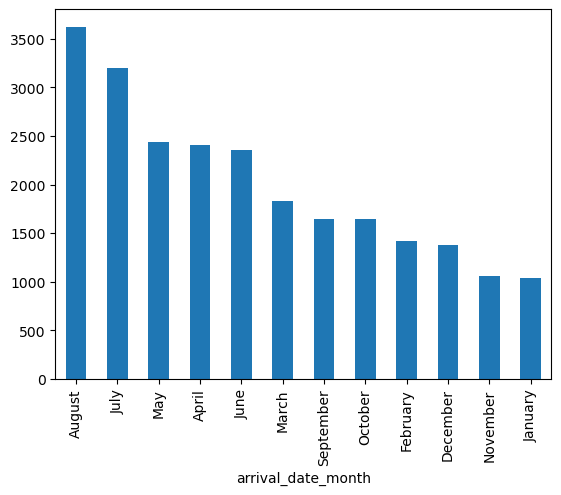

In [8]:
cancellations['arrival_date_month'].value_counts().plot(kind='bar')

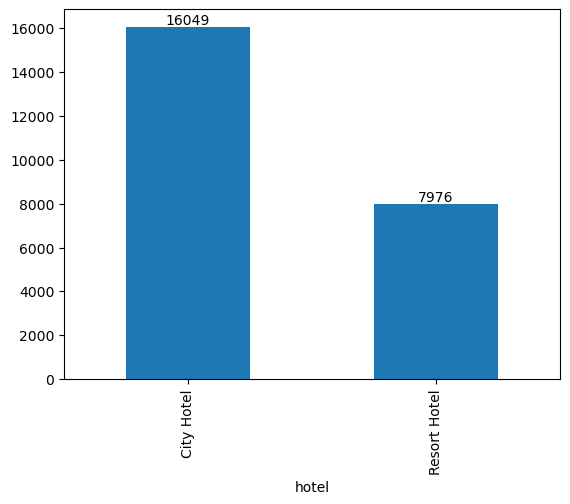

In [9]:
ax = cancellations['hotel'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

<Axes: ylabel='Frequency'>

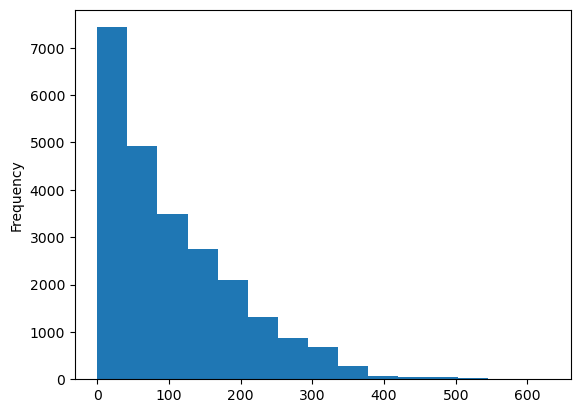

In [10]:
cancellations['lead_time'].plot(kind='hist', bins=15)

In [11]:
cancellations['lead_time'].value_counts()

lead_time
0      353
12     224
18     221
1      214
17     202
      ... 
605      1
397      1
626      1
411      1
380      1
Name: count, Length: 465, dtype: int64

<Axes: xlabel='deposit_type'>

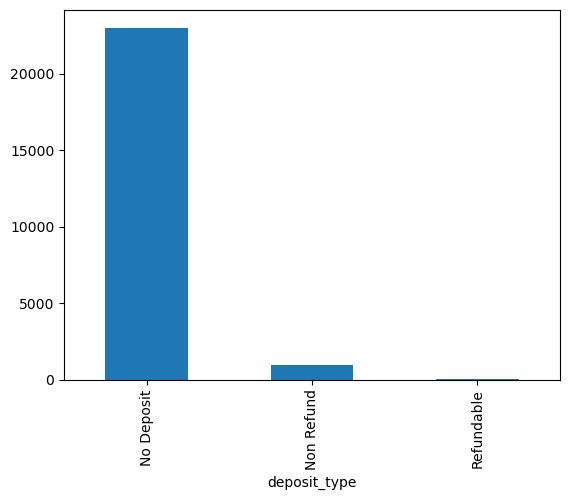

In [12]:
cancellations['deposit_type'].value_counts().plot(kind='bar')

<Axes: xlabel='customer_type'>

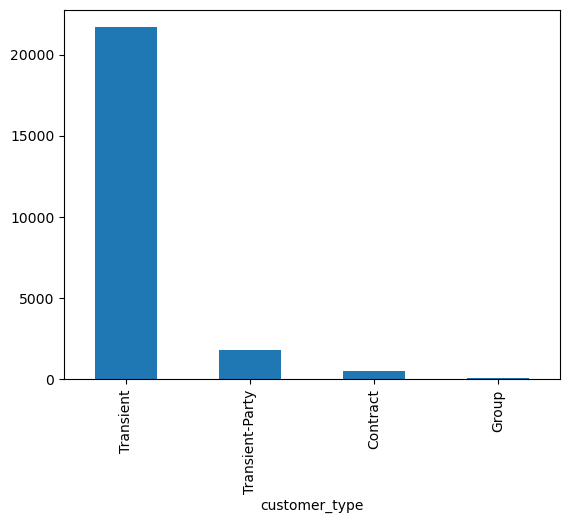

In [13]:
cancellations['customer_type'].value_counts().plot(kind='bar')

## K-Means Clusterization

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Data Preprocessing

In [15]:
# Drop variables that add too much dimensionality or don't have enough data
hotel_df.drop(columns=['reservation_status_date', 'country', 'company', 'reservation_status'], inplace=True)

In [16]:
# Handle missing data
hotel_df['agent'] = hotel_df['agent'].fillna(hotel_df['agent'].median())
hotel_df['children'] = hotel_df['children'].fillna(hotel_df['babies'].median())

In [17]:
# Split data into X and y
y = hotel_df['is_canceled']
X = hotel_df.drop(columns=['is_canceled'])

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Define transformers for each feature type
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

# Create column transformer to apply transformers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

X_transformed = pipeline.fit_transform(X)

# Get the column names to apply to new df
column_names = []
for transformer in preprocessor.transformers_:
    if isinstance(transformer[1], OneHotEncoder):
        column_names.extend(transformer[1].get_feature_names_out())
    else:
        column_names.extend(transformer[2])

In [18]:
X_transformed = pd.DataFrame(X_transformed, columns=column_names)
X_transformed

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,3.751709,-0.634943,-0.074839,-1.932925,-0.29917,-0.839684
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,5.126769,-0.634943,-0.074839,-1.932925,-0.29917,-0.839684
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,-0.634943,-0.074839,-0.569627,-0.29917,-0.839684
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,2.035289,-0.074839,-0.569627,-0.29917,-0.839684
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,1.445997,-0.074839,-0.151549,-0.29917,0.362324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,2.863982,-0.074839,-0.185359,-0.29917,-0.839684
87392,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,-0.680982,-0.074839,2.164786,-0.29917,1.564332
87393,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,-0.680982,-0.074839,0.933819,-0.29917,3.968348
87394,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.095288,-0.201653,-0.082389,-0.106237,-0.373470,0.055634,-0.074839,-0.035214,-0.29917,-0.839684


Feature importance using a RF

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, stratify=y, test_size = 0.25, random_state = 42)

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

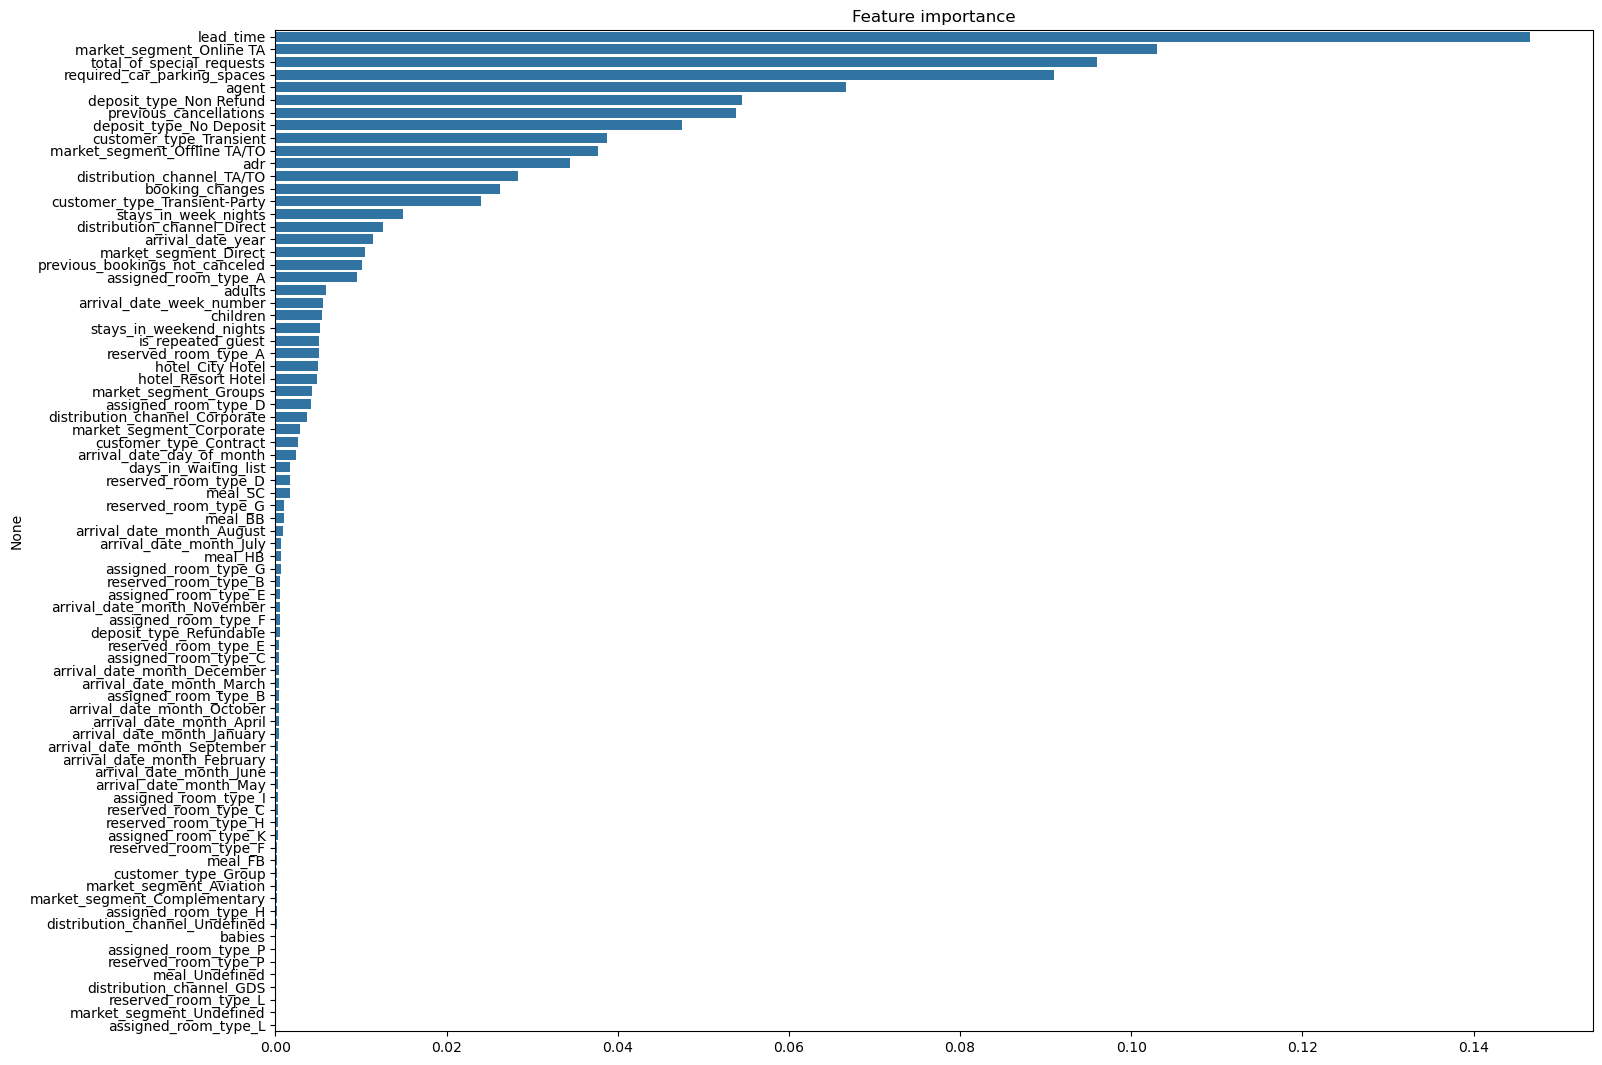

In [20]:
fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

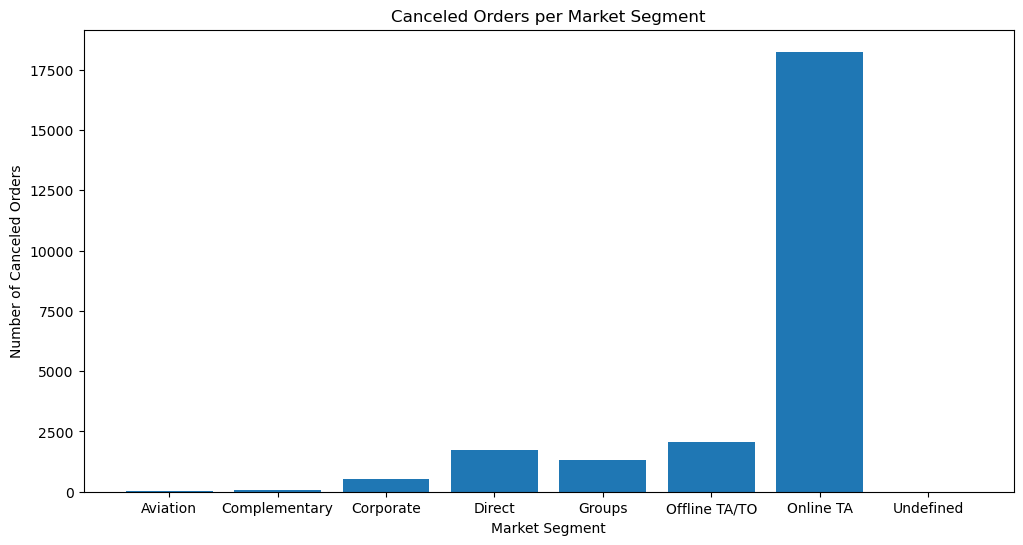

In [43]:
# Count the number of canceled orders per market segment
canceled_per_segment = hotel_df.groupby('market_segment')['is_canceled'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(canceled_per_segment.index, canceled_per_segment.values)
plt.xlabel("Market Segment")
plt.ylabel("Number of Canceled Orders")
plt.title("Canceled Orders per Market Segment")
plt.show()

In [21]:
# Reducing features using the feature importance
X_reduced = X_transformed.drop(columns=fimp[fimp<0.01].index)

For n_clusters = 4 The average silhouette_score is : 0.15362481700983247
For n_clusters = 6 The average silhouette_score is : 0.13019667720720532
For n_clusters = 8 The average silhouette_score is : 0.12429218297933611
For n_clusters = 11 The average silhouette_score is : 0.13309455177339685
For n_clusters = 14 The average silhouette_score is : 0.11956066403159786
For n_clusters = 18 The average silhouette_score is : 0.13376882103963358


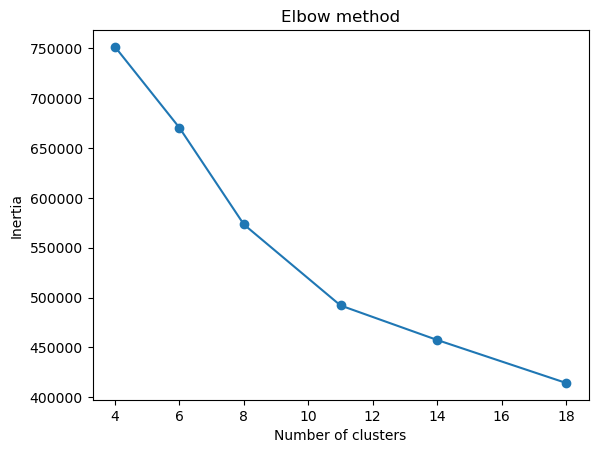

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
range_n_clusters = [4,6,8,11,14,18]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    #kmeans.fit(X_transformed)
    cluster_labels = kmeans.fit_predict(X_reduced)
    inertias.append(kmeans.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_avg)

plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

Using optimal clusters

In [23]:
kmeans = KMeans(n_clusters=11, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)
cluster_labels

array([5, 5, 7, ..., 4, 2, 8])

In [24]:
hotel_df['cluster'] = cluster_labels

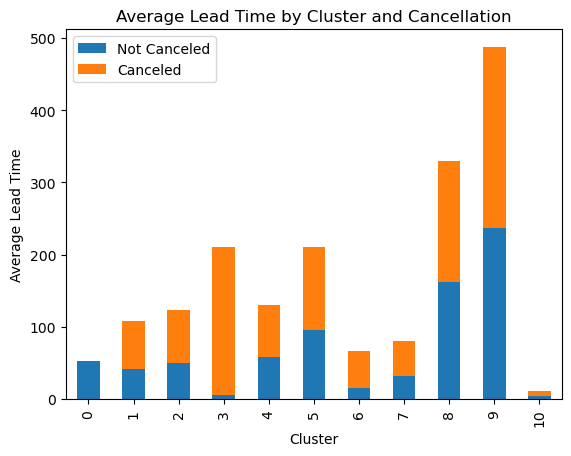

In [25]:
# Group by 'cluster' and 'is_canceled'
grouped_data = hotel_df.groupby(['cluster', 'is_canceled'])

# Calculate average lead_time for each group
avg_lead_time = grouped_data['lead_time'].mean()

# Create a pivot table for easier plotting
pivot_data = avg_lead_time.reset_index().pivot(index='cluster', columns='is_canceled', values='lead_time')

# Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time by Cluster and Cancellation')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

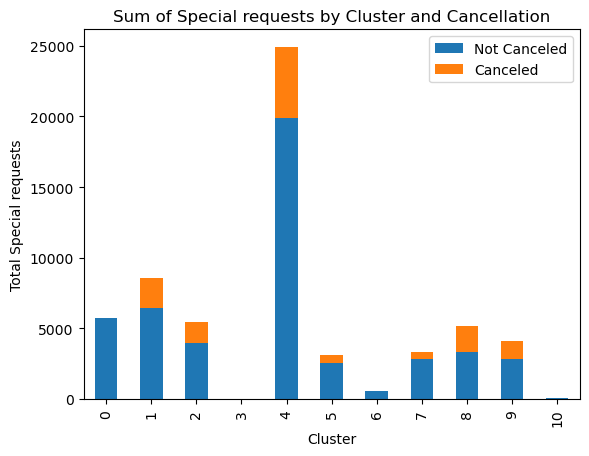

In [31]:
# Group by 'cluster' and 'is_canceled'
grouped_data = hotel_df.groupby(['cluster', 'is_canceled'])

# Calculate average lead_time for each group
special_req_sum = grouped_data['total_of_special_requests'].sum()

# Create a pivot table for easier plotting
pivot_data = special_req_sum.reset_index().pivot(index='cluster', columns='is_canceled', values='total_of_special_requests')

# Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Total Special requests')
plt.title('Sum of Special requests by Cluster and Cancellation')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()